In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


In [2]:
df = pd.read_csv('data_science_job.csv')

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [4]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [7]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]

cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [11]:
df[cols].sample(10)

,city_development_index,enrolled_university,education_level,experience,training_hours
3893,0.910,Part time course,Graduate,19.0,9.0
3394,0.910,no_enrollment,Graduate,20.0,130.0
4883,0.624,Full time course,Graduate,4.0,28.0
17724,0.920,no_enrollment,High School,3.0,33.0
9420,0.910,no_enrollment,Graduate,8.0,55.0
10628,0.624,no_enrollment,Graduate,15.0,5.0
13697,0.910,no_enrollment,Graduate,2.0,130.0
10630,0.624,no_enrollment,Graduate,5.0,16.0
6549,0.579,Full time course,Graduate,20.0,214.0
12029,0.897,no_enrollment,Masters,20.0,30.0


In [12]:
len(df[cols].dropna()) / len(df)

0.8968577095730244

In [13]:
new_df = df[cols].dropna()
df.shape,new_df.shape

((19158, 13), (17182, 5))

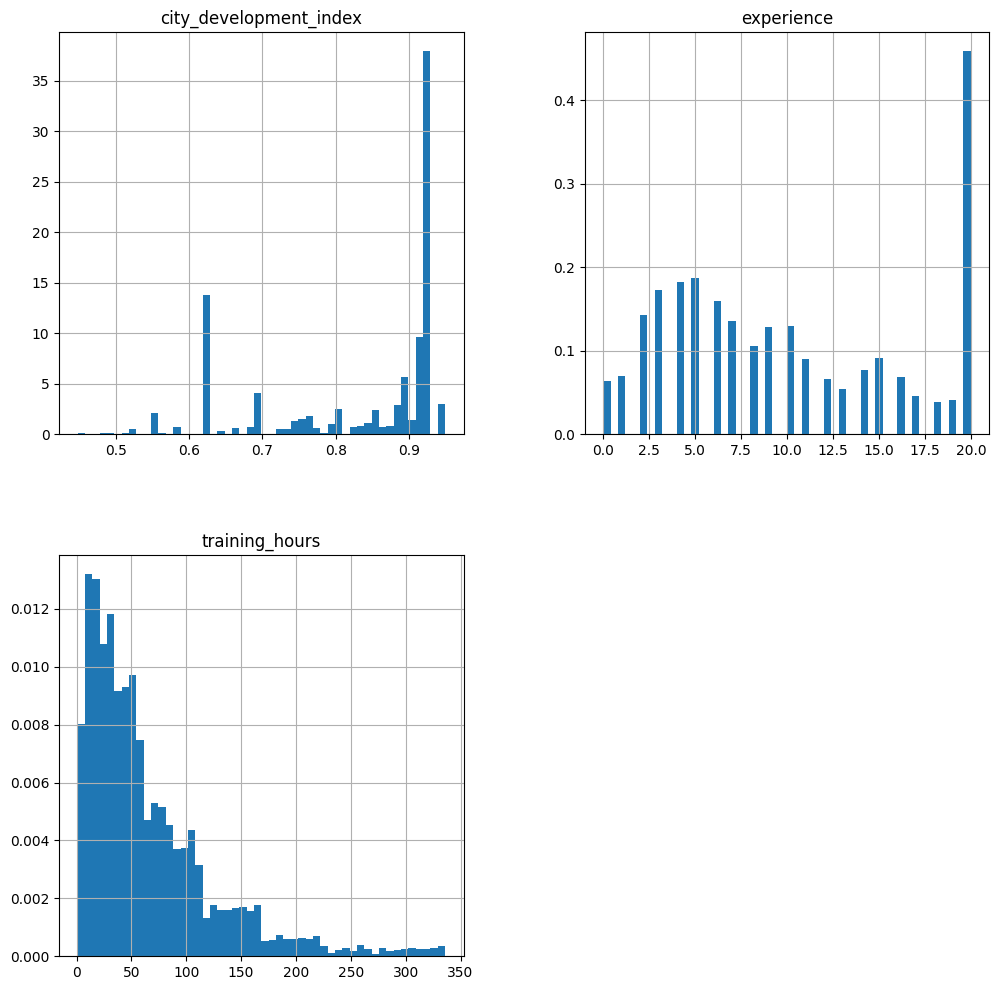

In [14]:
new_df.hist(bins=50, density=True, figsize=(12,12))
plt.show()

C:\Users\rudra\AppData\Local\Temp\ipykernel_2444\2777196056.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


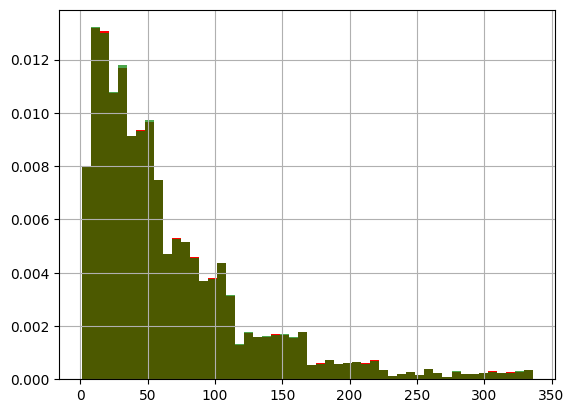

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original Data
df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argue,ent aplpha kames the coulor transparent
new_df['training_hours'].hist(bins=50,ax=ax,color='green', density=True, alpha=0.7)

fig.show()

C:\Users\rudra\AppData\Local\Temp\ipykernel_2444\1310605127.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


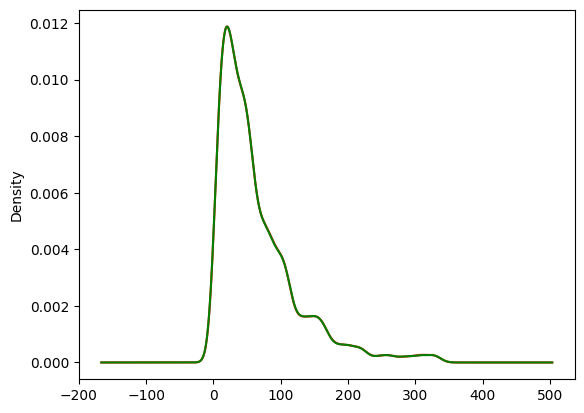

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original Data
df['training_hours'].plot.density(color='red')

# data after cca
new_df['training_hours'].plot.density(color='green')

fig.show()

C:\Users\rudra\AppData\Local\Temp\ipykernel_2444\845923004.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


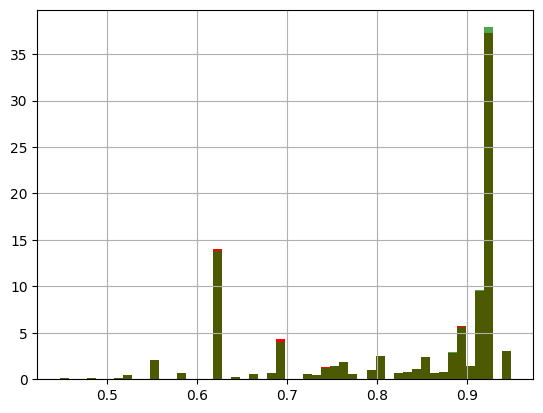

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original Data
df['city_development_index'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argue,ent aplpha kames the coulor transparent
new_df['city_development_index'].hist(bins=50,ax=ax,color='green', density=True, alpha=0.7)

fig.show()

C:\Users\rudra\AppData\Local\Temp\ipykernel_2444\3854190429.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


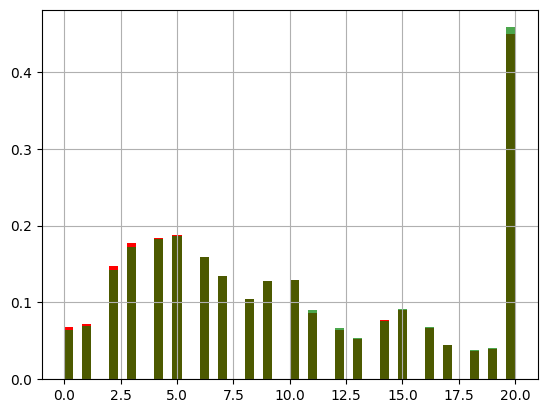

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original Data
df['experience'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argue,ent aplpha kames the coulor transparent
new_df['experience'].hist(bins=50,ax=ax,color='green', density=True, alpha=0.7)

fig.show()

In [22]:
df['enrolled_university'].value_counts()

enrolled_university
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: count, dtype: int64

In [23]:
df['education_level'].value_counts()

education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64

In [26]:
temp = pd.concat([
    df['enrolled_university'].value_counts() / len(df),
    
    new_df['enrolled_university'].value_counts() / len(new_df)
],
                 axis=1)

temp.columns = ['original', 'cca']

temp

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [27]:
temp = pd.concat([
    df['education_level'].value_counts() / len(df),
    
    new_df['education_level'].value_counts() / len(new_df)
],
                 axis=1)

temp.columns = ['original', 'cca']

temp

,original,cca
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
